In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Number of points
N = 100

In [3]:
# Initial a random set of N points with coordinates in [0,300)x[0,300):
P = [(np.random.randint(0, 300), np.random.randint(0, 300)) for _ in range(N)]
P

[(289, 76),
 (126, 46),
 (114, 95),
 (229, 108),
 (153, 95),
 (286, 251),
 (286, 223),
 (46, 165),
 (91, 270),
 (52, 47),
 (250, 182),
 (255, 165),
 (139, 142),
 (141, 229),
 (153, 76),
 (70, 254),
 (20, 274),
 (152, 247),
 (248, 86),
 (93, 251),
 (130, 94),
 (244, 68),
 (228, 136),
 (268, 45),
 (131, 245),
 (184, 154),
 (95, 266),
 (5, 148),
 (136, 237),
 (176, 61),
 (127, 184),
 (240, 196),
 (217, 293),
 (211, 286),
 (112, 240),
 (239, 230),
 (258, 127),
 (236, 261),
 (6, 215),
 (36, 0),
 (213, 67),
 (186, 147),
 (162, 143),
 (69, 13),
 (191, 230),
 (166, 2),
 (254, 278),
 (80, 215),
 (18, 288),
 (163, 188),
 (177, 182),
 (69, 96),
 (143, 125),
 (159, 68),
 (290, 168),
 (143, 196),
 (202, 103),
 (140, 66),
 (56, 75),
 (85, 80),
 (216, 240),
 (73, 75),
 (4, 90),
 (25, 145),
 (255, 148),
 (208, 131),
 (225, 16),
 (14, 197),
 (268, 88),
 (199, 268),
 (124, 173),
 (63, 168),
 (135, 154),
 (191, 188),
 (104, 147),
 (58, 106),
 (58, 275),
 (283, 286),
 (28, 180),
 (229, 122),
 (225, 247),


Graham Scan Algorithm

In [4]:
def RightTurn(p1, p2, p3):
    if (p3[1] - p1[1]) * (p2[0] - p1[0]) >= (p2[1] - p1[1]) * (p3[0] - p1[0]):
        return False
    return True

In [5]:
# 1. Sort the set of points
P.sort()
P

[(4, 90),
 (5, 148),
 (6, 215),
 (14, 197),
 (15, 158),
 (18, 288),
 (20, 274),
 (25, 145),
 (28, 180),
 (29, 287),
 (30, 197),
 (31, 200),
 (36, 0),
 (36, 146),
 (45, 214),
 (46, 165),
 (52, 47),
 (56, 75),
 (58, 106),
 (58, 275),
 (63, 168),
 (69, 13),
 (69, 96),
 (70, 254),
 (73, 75),
 (80, 215),
 (85, 80),
 (88, 126),
 (91, 167),
 (91, 270),
 (93, 251),
 (95, 266),
 (100, 133),
 (104, 147),
 (112, 240),
 (114, 95),
 (117, 207),
 (123, 78),
 (124, 173),
 (126, 46),
 (127, 184),
 (130, 94),
 (130, 157),
 (131, 245),
 (135, 154),
 (136, 237),
 (139, 142),
 (140, 66),
 (141, 229),
 (143, 125),
 (143, 196),
 (152, 247),
 (153, 76),
 (153, 95),
 (153, 294),
 (155, 136),
 (159, 68),
 (162, 143),
 (163, 188),
 (166, 2),
 (176, 61),
 (177, 182),
 (184, 154),
 (186, 147),
 (188, 19),
 (191, 188),
 (191, 230),
 (192, 199),
 (196, 73),
 (199, 268),
 (202, 103),
 (208, 131),
 (211, 286),
 (213, 67),
 (216, 240),
 (217, 293),
 (225, 16),
 (225, 247),
 (228, 136),
 (229, 108),
 (229, 122),
 (236,

In [6]:
# 2. Initialize upper part
L_upper = [P[0], P[1]]

In [7]:
# 3. Compute the upper part of the hull
for i in range(2, len(P)):
    L_upper.append(P[i])
    while len(L_upper) > 2 and not RightTurn(L_upper[-1], L_upper[-2], L_upper[-3]):
        del L_upper[-2]

In [8]:
L_upper

[(4, 90), (36, 0), (166, 2), (225, 16), (268, 45), (289, 76), (290, 168)]

In [9]:
# 4. Initialize the lower part
L_lower = [P[-1], P[-2]]

In [10]:
# 5. Compute the lower part of the hull
for i in range(len(P) - 3, -1, -1):
    L_lower.append(P[i])
    while len(L_lower) > 2 and not RightTurn(L_lower[-1], L_lower[-2], L_lower[-3]):
        del L_lower[-2]

In [11]:
L_lower

[(290, 168),
 (286, 251),
 (283, 286),
 (217, 293),
 (153, 294),
 (18, 288),
 (6, 215),
 (4, 90)]

In [12]:
# delete two point has been init
del L_lower[0]
del L_lower[-1]

In [13]:
# 6. Build the full hull
L = L_upper + L_lower
L

[(4, 90),
 (36, 0),
 (166, 2),
 (225, 16),
 (268, 45),
 (289, 76),
 (290, 168),
 (286, 251),
 (283, 286),
 (217, 293),
 (153, 294),
 (18, 288),
 (6, 215)]

In [14]:
# figure out result
def draw(L, P, path=None):
    plt.figure()
    plt.plot(L[:, 0], L[:, 1], 'b-', picker=5)
    plt.plot([L[-1, 0], L[0, 0]], [L[-1, 1], L[0, 1]], 'b-', picker=5)
    plt.plot(P[:, 0], P[:, 1], ".r")
    plt.axis('off')
    if path:
        plt.savefig(path)
    plt.show()

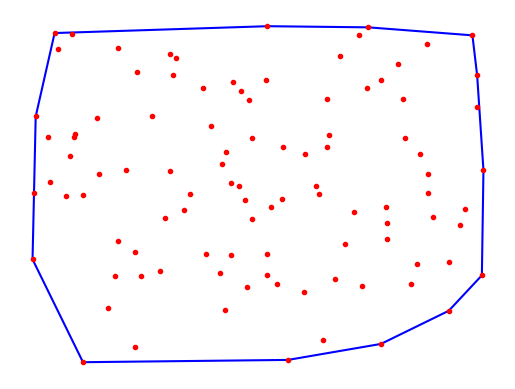

In [17]:
# Plot the computed Convex_Hull:
result_path = 'Graham_Scan_Result.png'
L = np.array(L)
P = np.array(P)
draw(L, P, path=result_path)